## Model Training Explanation
This notebook is about training 1 Model C with Grayscale local histogram normalized Images.

In [1]:
import matplotlib.pyplot as plt

In [1]:
from importlib import reload

import vpc_cnn_c
import vpc_data

reload(vpc_cnn_c)
reload(vpc_data)

<module 'vpc_data' from 'c:\\Universidade\\vpc\\VPC-TP\\src\\single_model_C_gray\\vpc_data.py'>

In [3]:
X_train, y_train, X_val, y_val = vpc_data.load_training_data(validation_split=0.2)

Loading Training data from 43 directories
Training images loaded. Shuffling data.
X_train_gray.shape (31367, 30, 30, 1)
X_valid_gray.shape (7842, 30, 30, 1)
y_train.shape (31367,)
y_valid.shape (7842,)


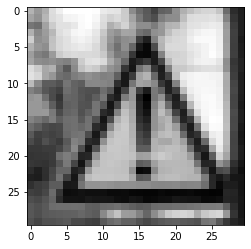

In [4]:
plt.imshow(X_train[0], cmap='gray')

In [5]:
model_c_gray = vpc_cnn_c.CNN_C_Gray("ModelCGray", img_size=30, channels=1)

Model: "ModelCGray"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 30, 1)]       0         
_________________________________________________________________
resizing (Resizing)          (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       1

In [6]:
model_c_gray.train( X_train, y_train, X_val, y_val, epochs=120, stop_early=True)

Epoch 1/120
981/981 [==============================] - 23s 19ms/step - loss: 1.2460 - accuracy: 0.6774 - val_loss: 0.1369 - val_accuracy: 0.9624

Epoch 00001: val_loss improved from inf to 0.13694, saving model to saved_models\ModelCGray
INFO:tensorflow:Assets written to: saved_models\ModelCGray\assets
Epoch 2/120
981/981 [==============================] - 24s 24ms/step - loss: 0.2506 - accuracy: 0.9244 - val_loss: 0.0419 - val_accuracy: 0.9865

Epoch 00002: val_loss improved from 0.13694 to 0.04185, saving model to saved_models\ModelCGray
INFO:tensorflow:Assets written to: saved_models\ModelCGray\assets
Epoch 3/120
981/981 [==============================] - 26s 26ms/step - loss: 0.1576 - accuracy: 0.9522 - val_loss: 0.0296 - val_accuracy: 0.9904

Epoch 00003: val_loss improved from 0.04185 to 0.02965, saving model to saved_models\ModelCGray
INFO:tensorflow:Assets written to: saved_models\ModelCGray\assets
Epoch 4/120
981/981 [==============================] - 53s 54ms/step - loss: 0.1

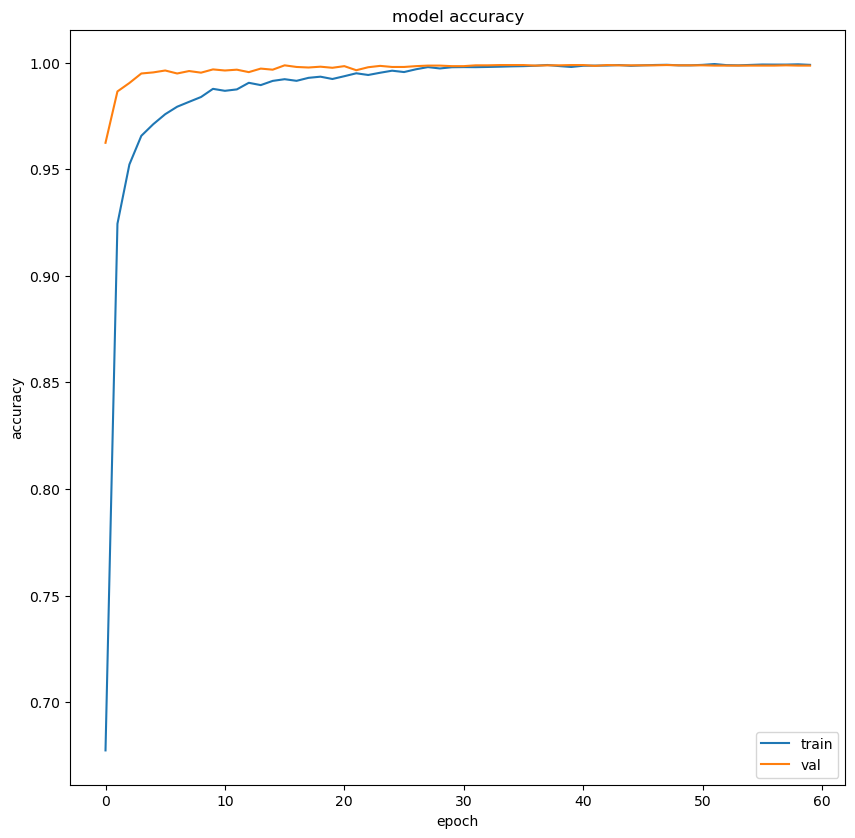

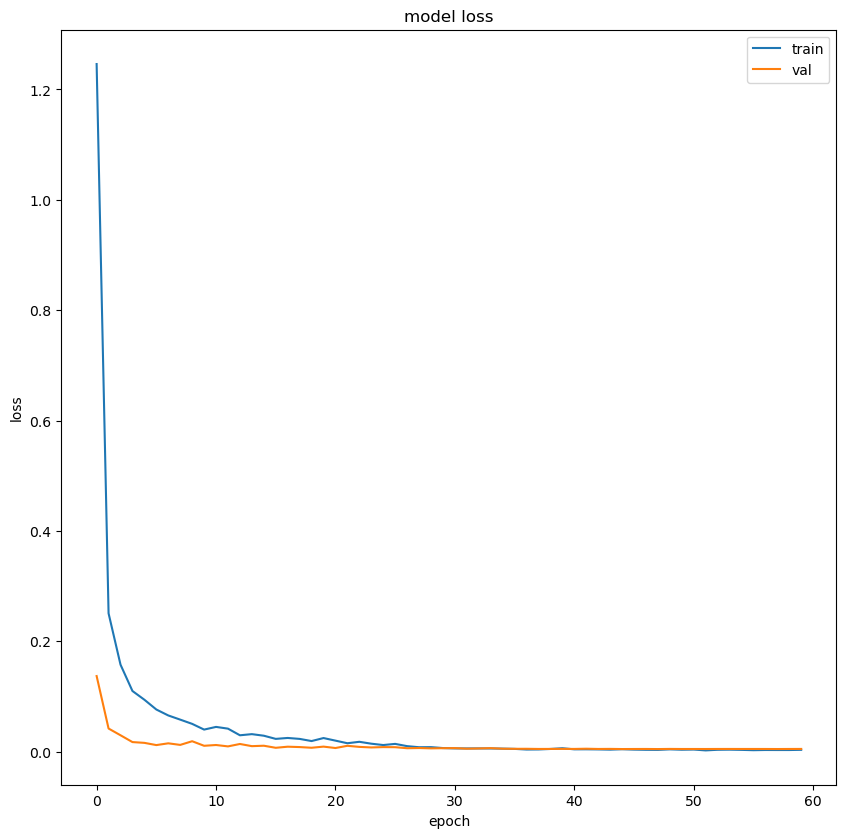

In [7]:
model_c_gray.plot_history()

In [2]:
X_test, y_test = vpc_data.load_testing_data()

Loading testing data from 43 directories
Test images loaded.
test_gray data shape:  (12630, 30, 30, 1)
test_labels shape:  (12630,)


Test Data accuracy:  98.48772763262075
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       1.00      0.99      1.00       720
           2       1.00      1.00      1.00       750
           3       1.00      0.95      0.97       450
           4       1.00      0.99      0.99       660
           5       0.95      1.00      0.97       630
           6       0.97      0.91      0.94       150
           7       1.00      0.99      1.00       450
           8       1.00      0.96      0.98       450
           9       0.99      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.93      0.97      0.95       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.94      1.00      0.97       210
          16       1.00      0.99      1.0

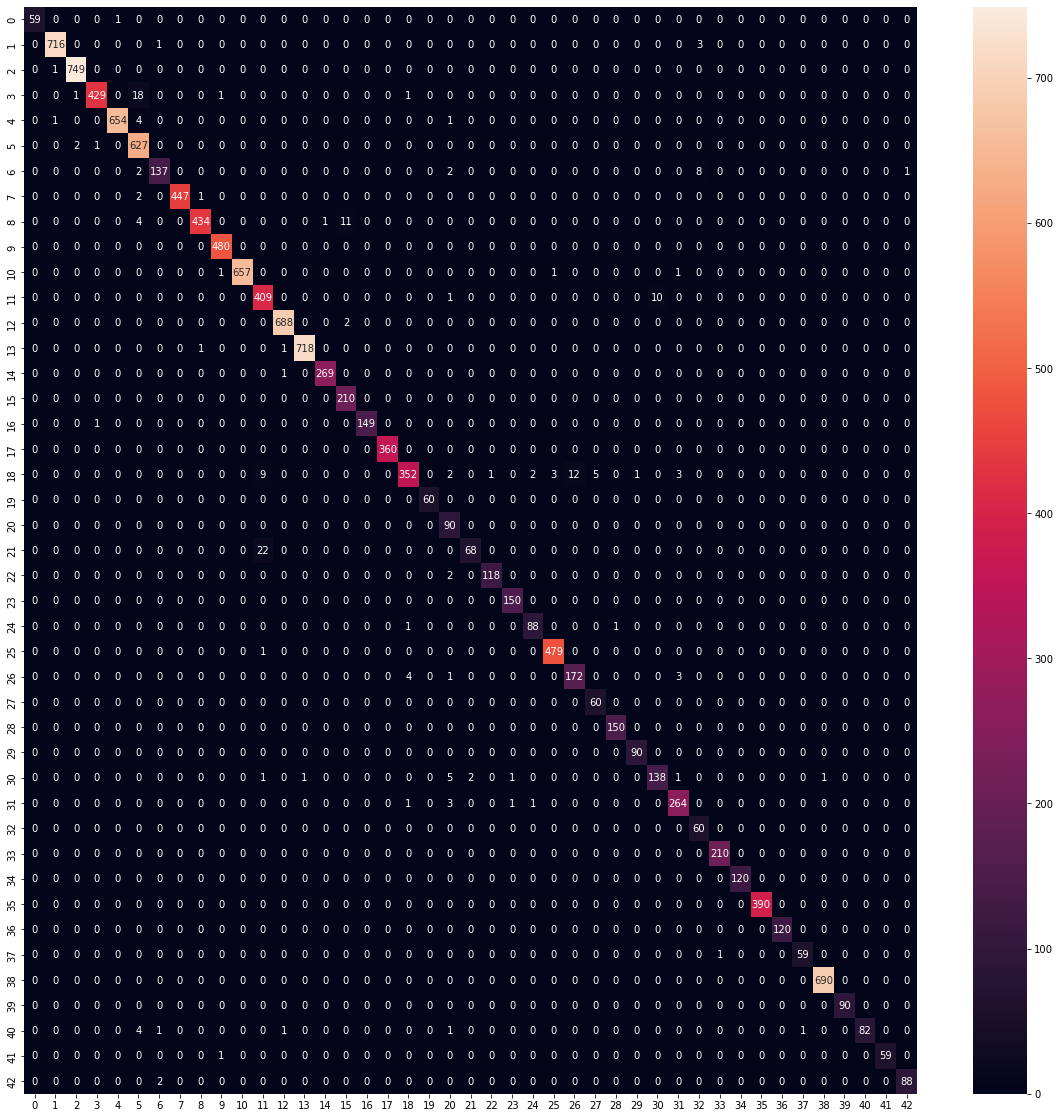

In [9]:
model_c_gray.evaluate(X_test, y_test)

In [3]:
loaded_model_C_gray =  vpc_cnn_c.CNN_C_Gray("ModelCGray", img_size=30, channels=3)
loaded_model_C_gray.load()
loaded_model_C_gray.evaluate_error(X_test, y_test)

Model: "ModelCGray"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 30, 3)]       0         
_________________________________________________________________
resizing (Resizing)          (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       1